In [15]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import math as m

# Exploring
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Visualizing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
from matplotlib import figure
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

pd.options.display.float_format = '{:20,.2f}'.format

# Personal Function Files
from acquire import *
from prepare_zillow import *
from explore_zillow import *

In [2]:
# turn_to_csv()

In [3]:
df = pd.read_csv('zillow_16_17.csv', sep='\t')

In [4]:
description_df = df[['unitcnt','propertylandusedesc',
                     'propertycountylandusecode', 'propertyzoningdesc', 'heatingorsystemdesc']]

In [5]:
df = drop_columns(df)

In [6]:
df = reindex_df(df)

In [7]:
df = dropna_fields(df)

In [8]:
df = unitcnt(df)

In [9]:
df = field_temp_drop(df)

In [10]:
df = lat_long_null_values(df)

In [11]:
df = drop_null(df)

In [12]:
df = df.dropna()

In [13]:
df = logerror_manipulation_func(df)

In [14]:
cols = list([
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount'])

col_1 = list([
 'logerror',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt'])

col_2 = list([
 'logerror',
 'yearbuilt'])

col_3 = list([
 'logerror',
 'lotsizesquarefeet',
 'landtaxvaluedollarcnt',])

col_4 = list([
 'logerror',
 'longitude',
 'latitude',])

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"92,574.00","11,857,871.36","719,582.17","10,711,738.00","11,195,035.25","11,852,924.00","12,509,221.50","13,895,489.00"
logerror,"92,574.00",0.01,0.16,-4.66,-0.03,0.01,0.04,5.26
bathroomcnt,"92,574.00",2.18,0.97,1.00,2.00,2.00,3.00,15.00
bedroomcnt,"92,574.00",2.95,0.99,1.00,2.00,3.00,4.00,16.00
calculatedfinishedsquarefeet,"92,574.00","1,665.61",885.81,214.00,"1,128.00","1,448.00","1,933.00","21,929.00"
lotsizesquarefeet,"92,574.00","38,684.91","146,062.08",857.00,"6,040.00","7,621.00","17,472.00","6,971,010.00"
latitude,"92,574.00","34,104,673.72","219,561.93","33,339,527.00","33,957,799.25","34,086,700.00","34,189,700.00","34,818,767.00"
longitude,"92,574.00","-118,256,601.77","215,492.71","-118,908,236.00","-118,418,895.00","-118,273,284.50","-118,112,000.00","-117,652,146.00"
regionidcity,"92,574.00","35,419.06","57,861.00","3,491.00","12,447.00","14,634.00","45,602.00","396,556.00"
regionidzip,"92,574.00","96,345.70",332.53,"95,982.00","96,123.00","96,282.00","96,433.00","97,344.00"


In [15]:
scale_df = scale_min_max_iris(df)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"92,574.00","11,857,871.36","719,582.17","10,711,738.00","11,195,035.25","11,852,924.00","12,509,221.50","13,895,489.00"
logerror,"92,574.00",0.01,0.16,-4.66,-0.03,0.01,0.04,5.26
bathroomcnt,"92,574.00",2.18,0.97,1.00,2.00,2.00,3.00,15.00
bedroomcnt,"92,574.00",2.95,0.99,1.00,2.00,3.00,4.00,16.00
calculatedfinishedsquarefeet,"92,574.00","1,665.61",885.81,214.00,"1,128.00","1,448.00","1,933.00","21,929.00"
lotsizesquarefeet,"92,574.00","38,684.91","146,062.08",857.00,"6,040.00","7,621.00","17,472.00","6,971,010.00"
latitude,"92,574.00","34,104,673.72","219,561.93","33,339,527.00","33,957,799.25","34,086,700.00","34,189,700.00","34,818,767.00"
longitude,"92,574.00","-118,256,601.77","215,492.71","-118,908,236.00","-118,418,895.00","-118,273,284.50","-118,112,000.00","-117,652,146.00"
regionidcity,"92,574.00","35,419.06","57,861.00","3,491.00","12,447.00","14,634.00","45,602.00","396,556.00"
regionidzip,"92,574.00","96,345.70",332.53,"95,982.00","96,123.00","96,282.00","96,433.00","97,344.00"


In [17]:
scale_df.describe().T

,count,mean,std,min,25%,50%,75%,max
abs_log,"92,574.00",0.07,0.14,0.00,0.02,0.03,0.07,5.26
assessmentyear,"92,574.00",0.47,0.50,0.00,0.00,0.00,1.00,1.00
bathroomcnt,"92,574.00",2.18,0.97,1.00,2.00,2.00,3.00,15.00
bedroomcnt,"92,574.00",2.95,0.99,1.00,2.00,3.00,4.00,16.00
calculatedfinishedsquarefeet,"92,574.00",0.07,0.04,0.00,0.04,0.06,0.08,1.00
censustractandblock,"92,574.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
landtaxvaluedollarcnt,"92,574.00",0.01,0.02,0.00,0.00,0.01,0.01,1.00
latitude,"92,574.00",0.52,0.15,0.00,0.42,0.51,0.57,1.00
logerror,"92,574.00",0.01,0.16,-4.66,-0.03,0.01,0.04,5.26
longitude,"92,574.00",0.52,0.17,0.00,0.39,0.51,0.63,1.00


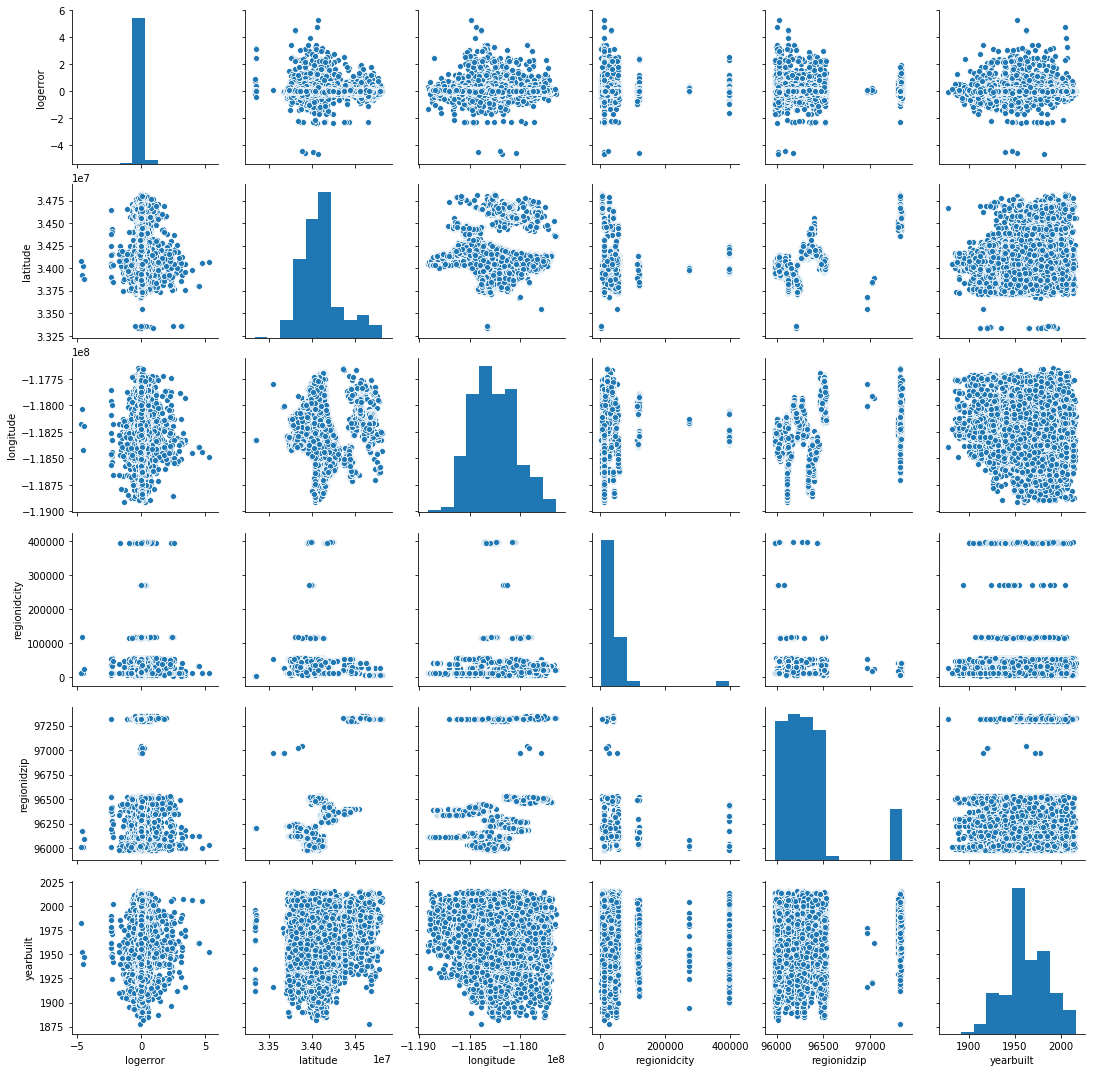

In [20]:
pairplot_func(df, col_1)

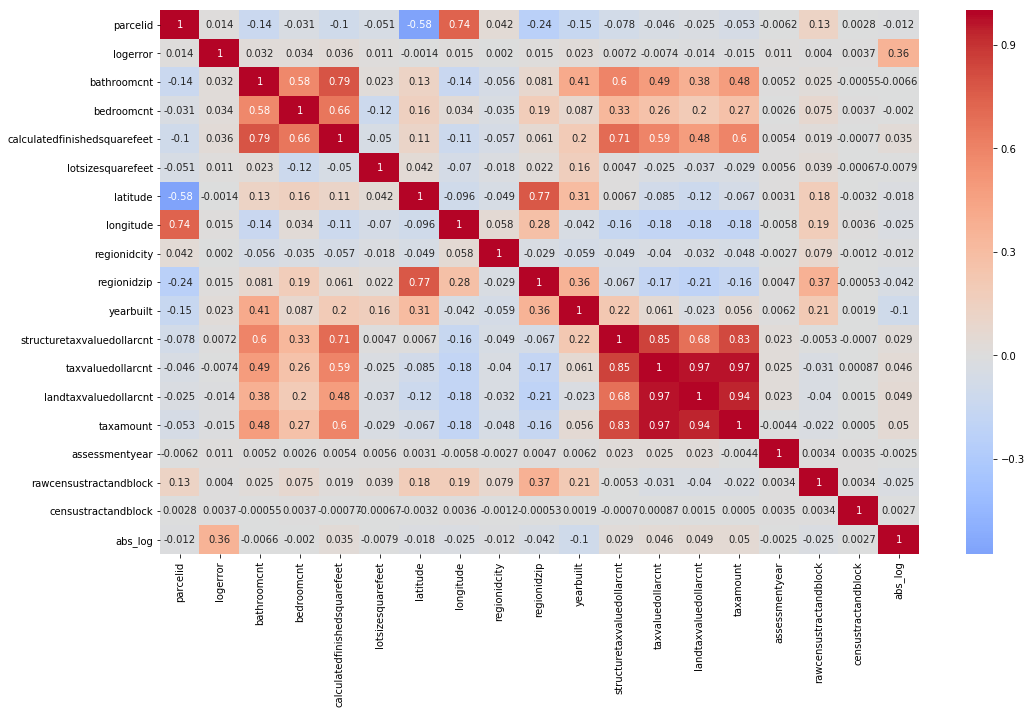

In [21]:
heatmap_func(df)

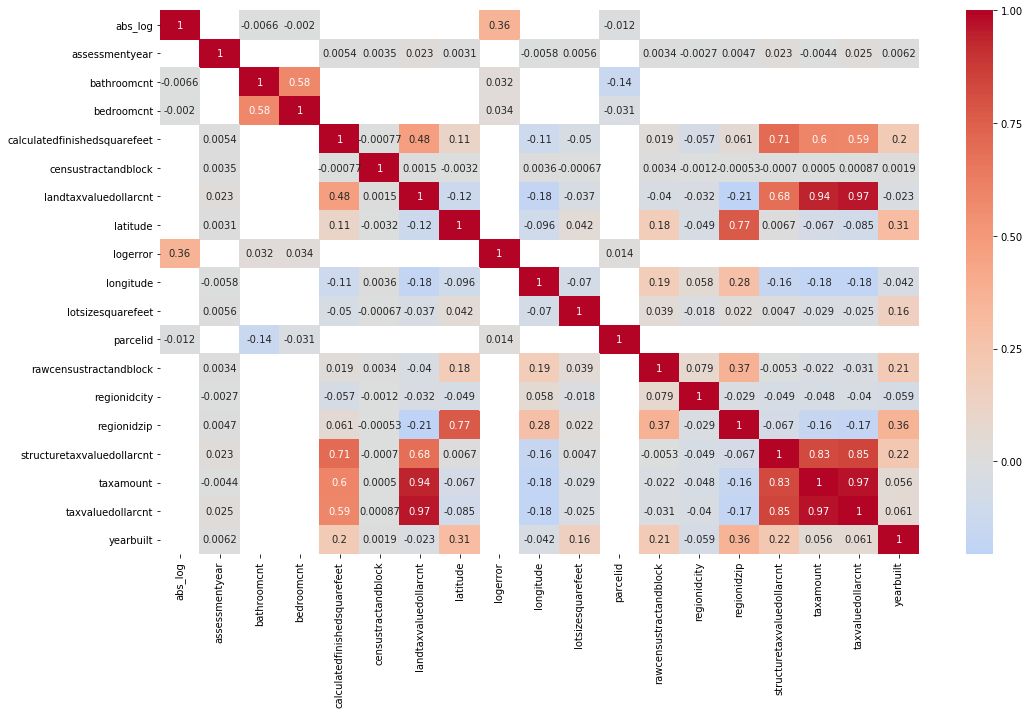

In [22]:
heatmap_func(scale_df)

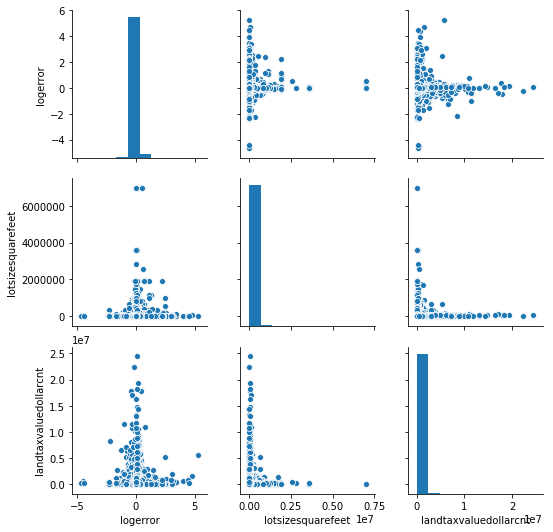

In [23]:
pairplot_func(df, col_3)

### Wasn't really sure if I had seen anything yet. I had a thought that log error might be high in certain locations. To check this i needed to look at lat/long and log error all together. Since this dataset is so dense iit would not be feasible to use a 2D scatter plot. I decided it would make sense to use a 3D plot because it would give a better view of the high/low log errors in relation to the lt/long. I went with a TriTurf plot to start.

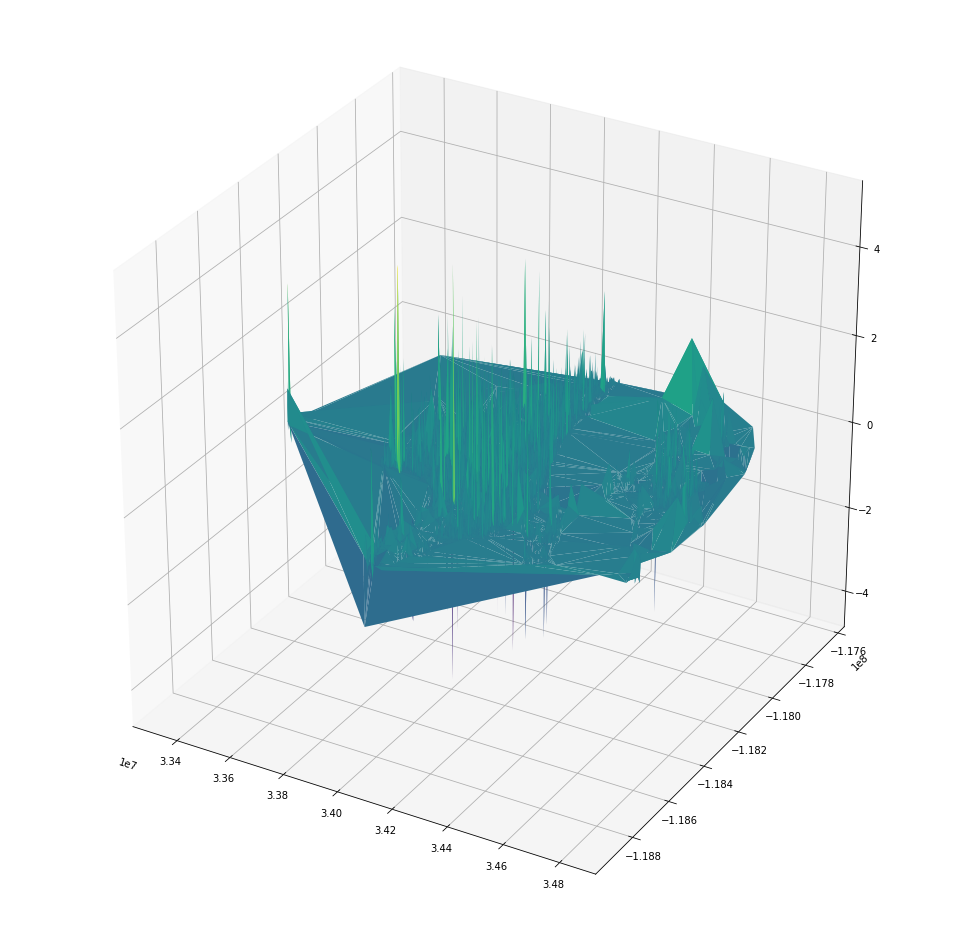

In [24]:
trisurf_func(df.latitude, df.longitude, df.logerror)

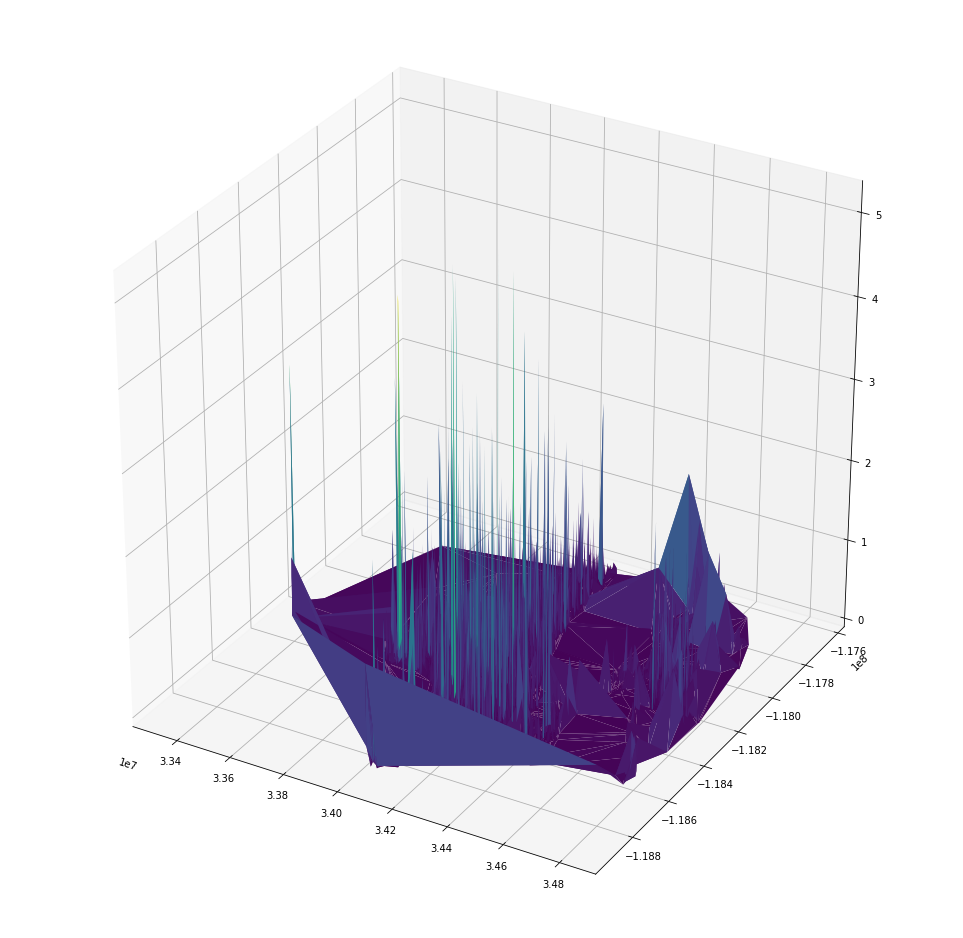

In [25]:
trisurf_func(df.latitude, df.longitude, df.abs_log)

### The TriSurf plot is helpful in showing that this type of plot (3D) is appropriate for viewing this type of data, but the TriSurf plot itself is not helpful in and of itself because the Z-axis data (logerror) is highly sporatic. A TriSurf plot needs less dramatic shifts in the Z-axis and there needs to be more density in the X-axis and the Y-axis, would be very useful for geopraghic data if elevation was given. Because this plot wasn't appropriate I decided to try using a 3D Scatterplot.

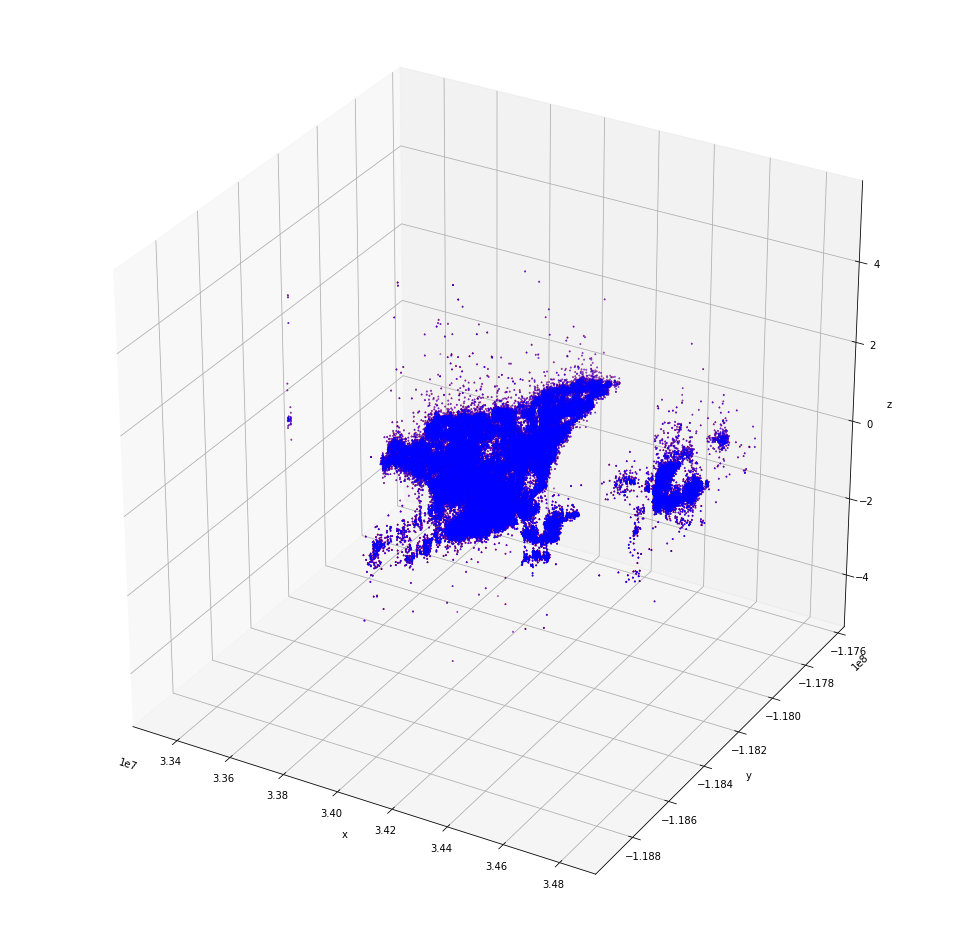

In [26]:
scatter_3d(df.latitude, df.longitude, df.logerror)

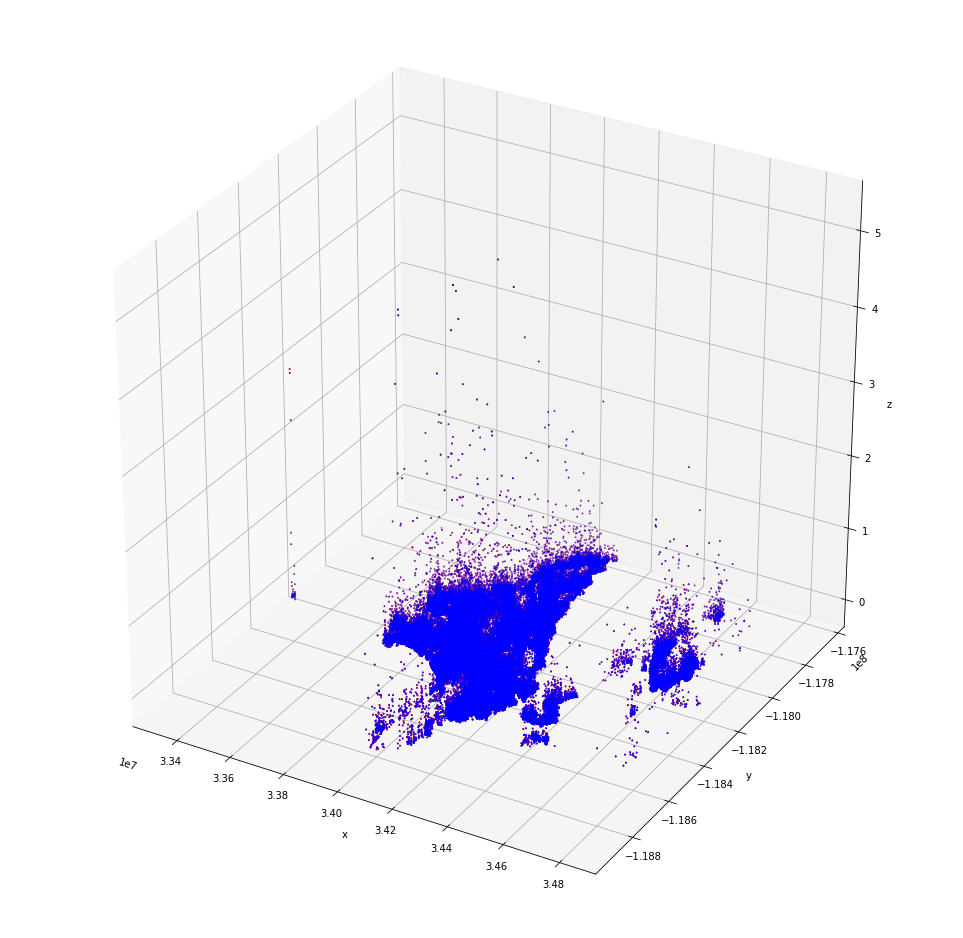

In [27]:
scatter_3d(df.latitude, df.longitude, df.abs_log)

In [52]:


scatter_3d(df.latitude, df.longitude, df.logerror_bin)

ValueError: could not convert string to float: 'medium-'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a182ecd08> (for post_execute):


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1224x1224 with 1 Axes>

In [59]:
pdf = df[['logerror_bin', 'abs_log']]
pdf

,logerror_bin,abs_log
0,medium-,0.03
2,good,0.00
3,medium-,0.02
5,bad,0.27
6,medium+,0.04
10,bad,0.38
11,medium-,0.02
12,medium-,0.03
17,medium+,0.04
19,good,0.01


### Run a pairplot on lat/long and log error to look at their relationships 2-dimensionally

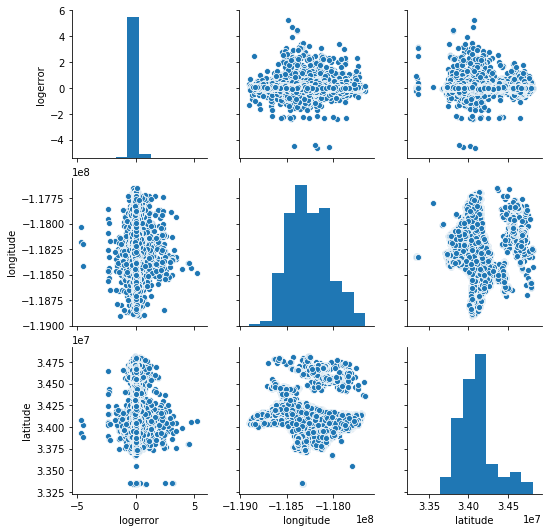

In [28]:
pairplot_func(df, col_4)

### After running the 3d scatterplot I could see concentrated areas of homes. The 3D view was sshowing me that there was a large number of datapoints on top of each other making it very hard to see what was going on or how much was really there. As seen before the 2D scatter plots do a poor job of showing an extremely dense plot. From there I decided that a KDE density plot was the most appropriate plot to check next.

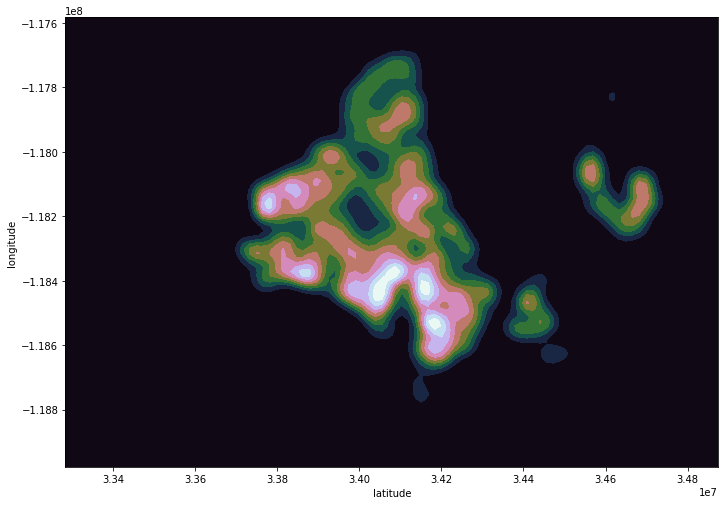

In [14]:
kde_func(df.latitude, df.longitude)

# <span style="color:red"> Time to start clustering </span>

### Looking at the kde plot I can see several key points that I might want a centroid for clustering. I will run 4 kmeans looking at 5, 6, 7, 8, 9 and 10 centroids to see which is more accurate. My presumption is that 8 will be the most accurate, but because of how close the high levels of density are, and how spread out the low levels of density are looking at a lower and higher number of centroids is necessary.

# <span style="color:red"> Need to do the T-Tests and Chi-Squared Tests </span>

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"92,574.00","11,857,871.36","719,582.17","10,711,738.00","11,195,035.25","11,852,924.00","12,509,221.50","13,895,489.00"
logerror,"92,574.00",0.01,0.16,-4.66,-0.03,0.01,0.04,5.26
bathroomcnt,"92,574.00",2.18,0.97,1.00,2.00,2.00,3.00,15.00
bedroomcnt,"92,574.00",2.95,0.99,1.00,2.00,3.00,4.00,16.00
calculatedfinishedsquarefeet,"92,574.00","1,665.61",885.81,214.00,"1,128.00","1,448.00","1,933.00","21,929.00"
lotsizesquarefeet,"92,574.00","38,684.91","146,062.08",857.00,"6,040.00","7,621.00","17,472.00","6,971,010.00"
latitude,"92,574.00","34,104,673.72","219,561.93","33,339,527.00","33,957,799.25","34,086,700.00","34,189,700.00","34,818,767.00"
longitude,"92,574.00","-118,256,601.77","215,492.71","-118,908,236.00","-118,418,895.00","-118,273,284.50","-118,112,000.00","-117,652,146.00"
regionidcity,"92,574.00","35,419.06","57,861.00","3,491.00","12,447.00","14,634.00","45,602.00","396,556.00"
regionidzip,"92,574.00","96,345.70",332.53,"95,982.00","96,123.00","96,282.00","96,433.00","97,344.00"


# <span style="color:red">T-Test Time</span>

In [22]:
stats.ttest_ind(df[df.latitude > 34104673.72].logerror.dropna(),
               df[df.latitude < 34104673.72].logerror.dropna())

Ttest_indResult(statistic=2.451462814712704, pvalue=0.014229523255563738)

In [23]:
stats.ttest_ind(df[df.longitude > -118256601.77].logerror.dropna(),
               df[df.longitude < -118256601.77].logerror.dropna())

Ttest_indResult(statistic=4.916897589714551, pvalue=8.80767107849252e-07)

In [46]:
stats.ttest_ind(df[df.regionidcity > 35419.06].logerror.dropna(),
               df[df.regionidcity < 35419.06].logerror.dropna())

Ttest_indResult(statistic=2.0950517510991724, pvalue=0.03616910261845007)

In [62]:
stats.ttest_ind(df[df.regionidzip > 96345].logerror.dropna(),
               df[df.regionidzip < 96345].logerror.dropna())

Ttest_indResult(statistic=6.3790154236112375, pvalue=1.7906757429801362e-10)

In [61]:
stats.ttest_ind(df[df.yearbuilt > 1962].logerror.dropna(),
               df[df.yearbuilt < 1962].logerror.dropna())

Ttest_indResult(statistic=6.0263398058048265, pvalue=1.6835376347723928e-09)

# <span style="color:red">Chi-Square Time</span>

In [36]:
crosstab = pd.crosstab(df['assessmentyear'] > 2015, df['logerror'])
stats.chi2_contingency(crosstab)

(92573.99999999999,
 0.0,
 44297,
 array([[0.53475058, 0.53475058, 0.53475058, ..., 0.53475058, 0.53475058,
         0.53475058],
        [0.46524942, 0.46524942, 0.46524942, ..., 0.46524942, 0.46524942,
         0.46524942]]))

In [33]:
df.shape

(92574, 20)

In [37]:
crosstab = pd.crosstab(df['regionidzip'] > 95982, df['logerror'])
stats.chi2_contingency(crosstab)

(45311.56164891054,
 0.0003556882716883178,
 44297,
 array([[0.00177156, 0.00177156, 0.00177156, ..., 0.00177156, 0.00177156,
         0.00177156],
        [0.99822844, 0.99822844, 0.99822844, ..., 0.99822844, 0.99822844,
         0.99822844]]))

In [39]:
crosstab = pd.crosstab(df['regionidcity'] > 3491, df['logerror'])
stats.chi2_contingency(crosstab)

(53198.70904701676,
 3.4822243306546067e-174,
 44297,
 array([[3.88878087e-04, 3.88878087e-04, 3.88878087e-04, ...,
         3.88878087e-04, 3.88878087e-04, 3.88878087e-04],
        [9.99611122e-01, 9.99611122e-01, 9.99611122e-01, ...,
         9.99611122e-01, 9.99611122e-01, 9.99611122e-01]]))

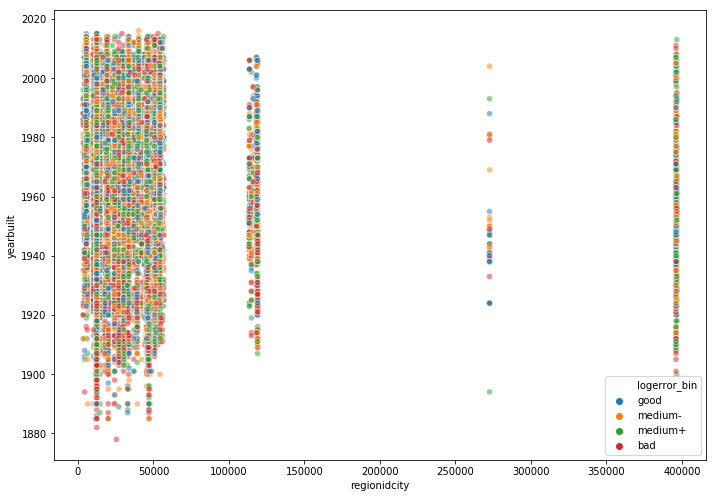

In [66]:
ax = sns.scatterplot(x="regionidcity", y="yearbuilt", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(11.7, 8.27)

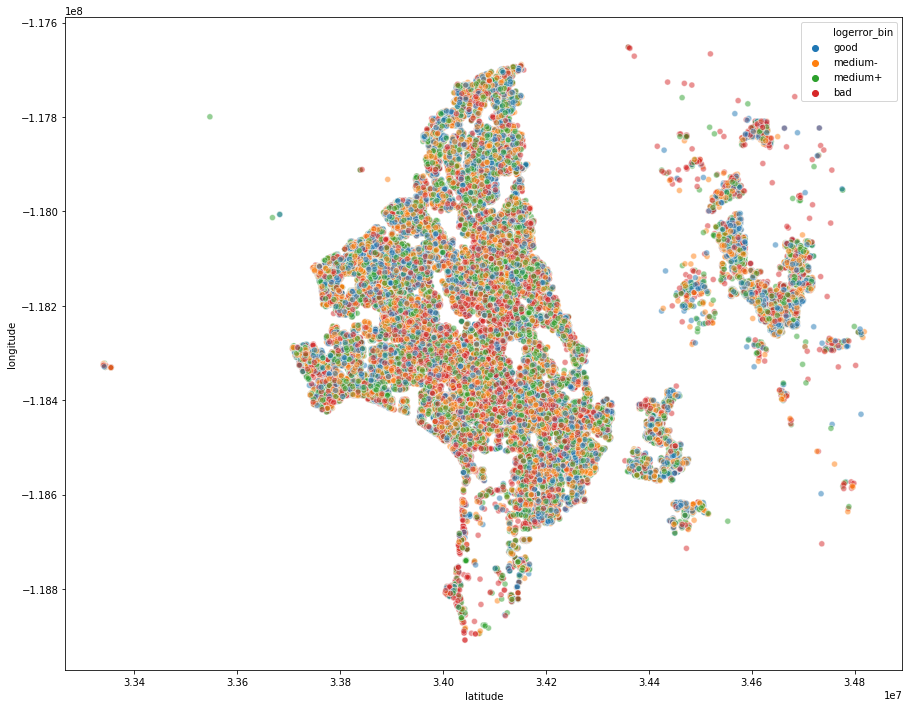

In [68]:
ax = sns.scatterplot(x="latitude", y="longitude", 
                     hue='logerror_bin', data=df, alpha=.5)
fig = plt.gcf()
fig.set_size_inches(15, 12)

In [73]:
df[df.logerror_bin == 'bad']df[df.logerror_bin == 'bad']

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,latitude,longitude,regionidcity,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear,rawcensustractandblock,censustractandblock,abs_log,logerror_bin
5,11509835,-0.27,4.00,4.00,"3,067.00","2,708.00","33,870,089.00","-118,402,768.00","29,712.00","96,109.00","1,982.00","880,650.00","2,447,951.00","1,567,301.00","27,126.57","2,015.00","60,376,210.04","60,376,210,044,006.00",0.27,bad
10,10854446,0.38,2.00,2.00,"1,417.00","8,279.00","34,164,671.00","-118,477,995.00","12,447.00","96,426.00","1,954.00","55,396.00","105,954.00","50,558.00","1,443.69","2,015.00","60,371,414.00","60,371,414,003,003.00",0.38,bad
23,11458863,0.12,4.00,3.00,"3,749.00","10,926.00","33,969,828.00","-118,396,647.00","12,447.00","96,026.00","1,952.00","319,449.00","1,194,279.00","874,830.00","14,747.98","2,015.00","60,372,770.01","60,372,770,005,008.00",0.12,bad
26,11188425,-0.07,2.00,2.00,"1,302.00","6,676.00","34,598,115.00","-118,154,873.00","40,227.00","97,329.00","1,986.00","80,600.00","174,000.00","93,400.00","3,895.76","2,015.00","60,379,102.08","60,379,102,081,016.00",0.07,bad
44,11708989,-0.09,1.00,3.00,"1,457.00","6,358.00","34,009,266.00","-118,313,092.00","12,447.00","96,043.00","1,912.00","28,576.00","119,375.00","90,799.00","3,668.14","2,015.00","60,372,315.00","60,372,315,003,003.00",0.09,bad
58,11403600,-0.15,2.00,2.00,"1,084.00","5,005.00","33,962,616.00","-118,360,632.00","45,888.00","96,133.00","1,923.00","84,730.00","129,113.00","44,383.00","2,054.31","2,015.00","60,376,012.11","60,376,012,112,006.00",0.15,bad
59,12086710,0.08,2.00,2.00,991.00,"29,725.00","34,139,900.00","-118,232,000.00","45,457.00","96,324.00","1,974.00","82,173.00","108,255.00","26,082.00","1,186.52","2,015.00","60,373,021.02","60,373,021,021,002.00",0.08,bad
61,12701128,0.21,3.00,4.00,"2,497.00","11,425.00","33,720,475.00","-118,320,259.00","12,447.00","96,222.00","1,961.00","82,926.00","442,308.00","359,382.00","5,819.38","2,015.00","60,372,974.00","60,372,974,002,019.00",0.21,bad
72,10746700,0.15,2.00,2.00,"1,536.00","5,709.00","34,131,574.00","-118,811,986.00","41,673.00","96,384.00","1,975.00","59,070.00","338,316.00","279,246.00","3,550.56","2,015.00","60,378,003.26","60,378,003,262,005.00",0.15,bad
92,11948830,-0.14,3.00,3.00,"2,186.00","9,348.00","34,107,836.00","-118,269,407.00","12,447.00","96,020.00","1,968.00","188,061.00","626,877.00","438,816.00","13,342.57","2,015.00","60,371,951.00","60,371,951,002,000.00",0.14,bad


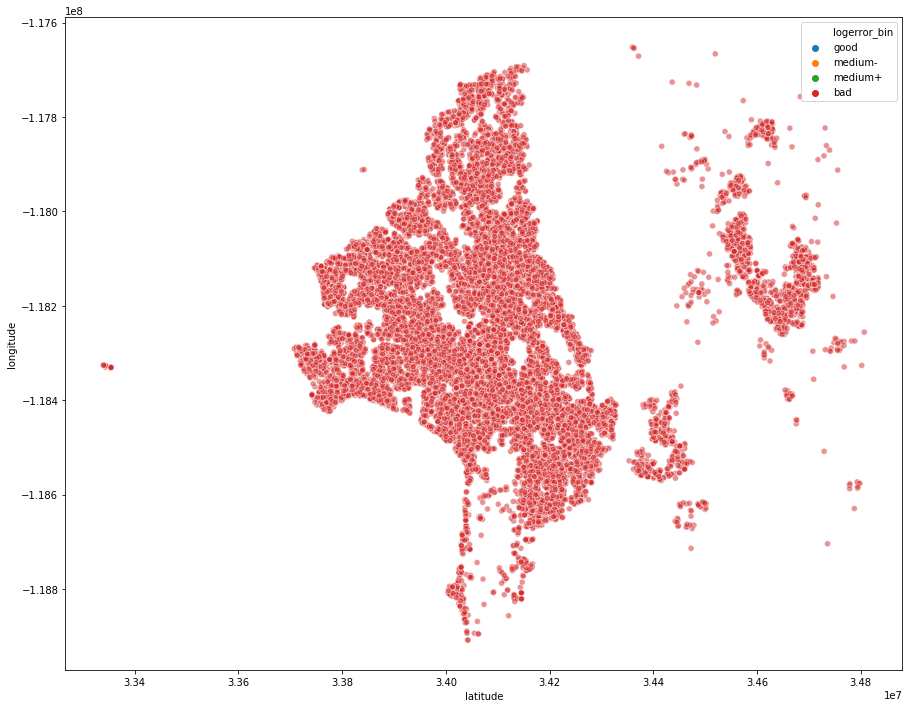

In [82]:
bad = df[df.logerror_bin == 'bad']
medium_bad = df[df.logerror_bin == 'medium-']
medium_good = df[df.logerror_bin == 'medium+']
good = df[df.logerror_bin == 'good']



ax = sns.scatterplot(x="latitude", y="longitude", 
                     hue='logerror_bin', data=bad, alpha=.5)
# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=medium_bad, alpha=.5)
# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=medium_good, alpha=.5)
# ax = sns.scatterplot(x="latitude", y="longitude", 
#                      hue='logerror_bin', data=good, alpha=.5)

fig = plt.gcf()
fig.set_size_inches(15, 12)

# K-Means

In [89]:
X1 = df[['logerror']]

In [84]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)

kmeans.predict(X1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [85]:
kmeans.cluster_centers_

array([[ 0.02640875],
       [ 0.39400148],
       [-0.09807456],
       [ 2.03934976],
       [-0.79092505]])

In [86]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [87]:
df['cluster1'] = kmeans.predict(X1)
df.cluster1.value_counts()

0    68606
2    19631
1     3618
4      561
3      158
Name: cluster1, dtype: int64

In [98]:
X2 = df[['latitude']]

In [92]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)

kmeans.predict(X2)

array([3, 3, 2, ..., 3, 1, 2], dtype=int32)

In [93]:
kmeans.cluster_centers_

array([[34405818.28314372],
       [34031563.60529241],
       [33846002.20700736],
       [34178428.248909  ],
       [34631971.93948784]])

In [94]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X2.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [95]:
df['cluster2'] = kmeans.predict(X2)
df.cluster2.value_counts()

3    29853
1    29603
2    20847
4     7423
0     4848
Name: cluster2, dtype: int64

In [97]:
X3 = df[['longitude']]

In [99]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X3)

kmeans.predict(X3)

array([0, 4, 4, ..., 4, 1, 1], dtype=int32)

In [100]:
kmeans.cluster_centers_

array([[-1.18570569e+08],
       [-1.18095982e+08],
       [-1.17859302e+08],
       [-1.18405903e+08],
       [-1.18252830e+08]])

In [101]:
cluster_target = pd.DataFrame(kmeans.cluster_centers_, columns=X3.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

In [102]:
df['cluster3'] = kmeans.predict(X3)
df.cluster3.value_counts()

3    25385
1    23694
4    20654
0    12859
2     9982
Name: cluster3, dtype: int64

In [103]:
df.head().T

,0,2,3,5,6
parcelid,11016594,12098116,12643413,11509835,12286022
logerror,0.03,-0.00,0.02,-0.27,0.04
bathroomcnt,2.00,3.00,2.00,4.00,1.00
bedroomcnt,3.00,2.00,2.00,4.00,2.00
calculatedfinishedsquarefeet,"1,684.00","2,217.00",839.00,"3,067.00","1,297.00"
lotsizesquarefeet,"7,528.00","11,423.00","70,859.00","2,708.00","6,677.00"
latitude,"34,280,990.00","34,136,312.00","33,755,800.00","33,870,089.00","33,899,475.00"
longitude,"-118,488,536.00","-118,175,032.00","-118,309,000.00","-118,402,768.00","-118,212,720.00"
regionidcity,"12,447.00","47,019.00","12,447.00","29,712.00","24,174.00"
regionidzip,"96,370.00","96,293.00","96,222.00","96,109.00","96,091.00"


3    29853
1    29603
2    20847
4     7423
0     4848
Name: cluster2, dtype: int64

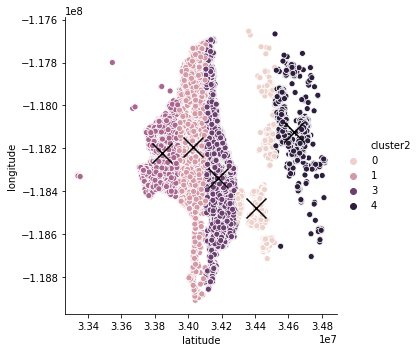

In [107]:
centers = df.groupby('cluster2').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster2')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')

df.cluster2.value_counts()

3    25385
1    23694
4    20654
0    12859
2     9982
Name: cluster3, dtype: int64

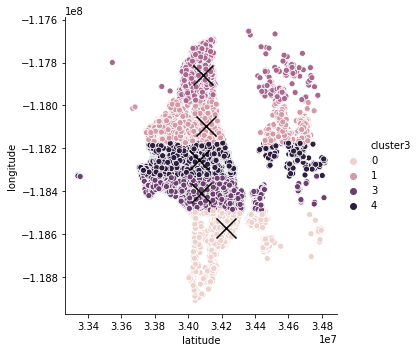

In [108]:
centers = df.groupby('cluster3').mean()


sns.relplot(data=df, x='latitude', y='longitude', hue='cluster3')
plt.scatter(centers.latitude, centers.longitude, s=400, marker='x', c='black', label='center')

df.cluster3.value_counts()

   k                                        sse
0  1 178,637,030,559,108,960,375,980,163,072.00
1  2       1,174,333,407,588,489,063,563,264.00
2  3         597,517,256,791,037,570,973,696.00
3  4         199,420,398,011,000,467,488,768.00
4  5          78,774,106,418,184,435,269,632.00
5  6          51,901,813,115,144,395,292,672.00
6  7          28,993,145,778,885,443,452,928.00
7  8          14,265,342,070,324,990,050,304.00
8  9           8,616,813,964,429,673,627,648.00


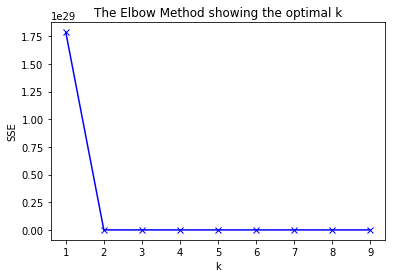

In [111]:
kdf = df.drop(columns=['logerror_bin'])


ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(kdf)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()